In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Q.1

In [2]:
df1=pd.read_csv('data.tsv', sep='\t')

In [3]:
df1.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.8,1422
1,tt0000002,6.4,168
2,tt0000003,6.6,1015
3,tt0000004,6.4,100
4,tt0000005,6.2,1713
5,tt0000006,5.5,88
6,tt0000007,5.5,573
7,tt0000008,5.6,1526
8,tt0000009,5.5,70
9,tt0000010,6.9,5083


In [4]:

df2=pd.read_csv('data-2.tsv', sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df2.head(10)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
5,tt0000002,2,A bohóc és kutyái,HU,\N,imdbDisplay,\N,0
6,tt0000002,3,Le clown et ses chiens,FR,\N,\N,\N,0
7,tt0000002,4,Clovnul si cainii sai,RO,\N,imdbDisplay,\N,0
8,tt0000002,5,The Clown and His Dogs,US,\N,\N,literal English title,0
9,tt0000002,6,Клоун и его собаки,RU,\N,\N,\N,0


In [6]:
df3=pd.read_csv('data-3.tsv', sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df3.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0.0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0.0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0.0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894,\N,45,Romance
9,tt0000010,short,Employees Leaving the Lumière Factory,La sortie de l'usine Lumière à Lyon,0.0,1895,\N,1,"Documentary,Short"


# Q.2

In [8]:
duplicate=df1[df1.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [tconst, averageRating, numVotes]
Index: []


In [9]:
duplicate=df2[df2.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [titleId, ordering, title, region, language, types, attributes, isOriginalTitle]
Index: []


In [10]:
duplicate=df3[df3.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [tconst, titleType, primaryTitle, originalTitle, isAdult, startYear, endYear, runtimeMinutes, genres]
Index: []


In [11]:
df1.duplicated().sum()

0

In [12]:
df2.duplicated().sum()

0

In [13]:
df3.duplicated().sum()

0

In [14]:
df2.rename(columns = {'titleId':'tconst'}, inplace = True)

In [15]:
df2.head()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1


# Q.3

In [16]:
#Inner Merge
merged_df = pd.merge(pd.merge(df1,df2,on='tconst'),df3,on='tconst')

In [17]:
merged_df.head()

,tconst,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.8,1422,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short"
1,tt0000001,5.8,1422,2,Карменсита,RU,\N,\N,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short"
2,tt0000001,5.8,1422,3,Carmencita,US,\N,\N,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short"
3,tt0000001,5.8,1422,4,Carmencita,\N,\N,original,\N,1,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short"
4,tt0000002,6.4,168,1,Le clown et ses chiens,\N,\N,original,\N,1,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short"


In [18]:
len(merged_df)

1313020

In [19]:
merged_df['titleType'].unique()

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [20]:
merged_df['titleType'].nunique()

10

# Q.4

In [21]:
df_new = merged_df[(merged_df['language'] == 'en') | (merged_df['region'] == 'US') & (merged_df['titleType']== 'movie') ]

# Q.5

In [22]:
df_new.head()

,tconst,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
51,tt0000009,5.5,70,3,Miss Jerry,US,\N,\N,\N,0,movie,Miss Jerry,Miss Jerry,0.0,1894,\N,45,Romance
74,tt0000012,7.4,8509,11,The Arrival of a Train,XWW,en,imdbDisplay,\N,0,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"Documentary,Short"
76,tt0000012,7.4,8509,13,The Arrival of a Train at La Ciotat,XWW,en,alternative,\N,0,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"Documentary,Short"
85,tt0000012,7.4,8509,21,The Arrival of a Train,XEU,en,imdbDisplay,\N,0,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"Documentary,Short"
131,tt0000016,5.9,967,1,Boat Leaving the Port,XWW,en,\N,informal title,0,short,Barque sortant du port,Barque sortant du port,0.0,1895,\N,1,"Documentary,Short"


In [25]:
df_new[df_new['log10Votes'] == np.log10(df_new['numVotes'])]

,tconst,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,log10Votes
51,tt0000009,5.5,70,3,Miss Jerry,US,\N,\N,\N,0,movie,Miss Jerry,Miss Jerry,0.0,1894,\N,45,Romance,1.845098
74,tt0000012,7.4,8509,11,The Arrival of a Train,XWW,en,imdbDisplay,\N,0,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"Documentary,Short",3.929879
76,tt0000012,7.4,8509,13,The Arrival of a Train at La Ciotat,XWW,en,alternative,\N,0,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"Documentary,Short",3.929879
85,tt0000012,7.4,8509,21,The Arrival of a Train,XEU,en,imdbDisplay,\N,0,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"Documentary,Short",3.929879
131,tt0000016,5.9,967,1,Boat Leaving the Port,XWW,en,\N,informal title,0,short,Barque sortant du port,Barque sortant du port,0.0,1895,\N,1,"Documentary,Short",2.985426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312930,tt1849204,5.2,72,3,Journey to Boscavia,XWW,en,\N,literal title,0,short,Voyage en Boscavie,Voyage en Boscavie,0.0,1958,\N,9,"Animation,Short",1.857332
1313000,tt1849718,7.0,19744,5,Path of Fire,US,\N,\N,alternative transliteration,0,movie,Agneepath,Agneepath,0.0,2012,\N,174,"Action,Drama",4.295435
1313003,tt1849740,7.8,33,1,Champions of the Deep,US,\N,\N,\N,0,movie,Champions of the Deep,Champions of the Deep,0.0,2012,\N,85,"Action,Adventure,Fantasy",1.518514
1313005,tt1849742,6.6,43,2,Life Is Bearable at Times...,XWW,en,imdbDisplay,\N,0,movie,Life Is Bearable at Times...,Chwilami zycie bywa znosne...,0.0,2010,\N,74,Documentary,1.633468


# Q.6

In [26]:
df_new['genres']=df_new['genres'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_new.head()

,tconst,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,log10Votes
51,tt0000009,5.5,70,3,Miss Jerry,US,\N,\N,\N,0,movie,Miss Jerry,Miss Jerry,0.0,1894,\N,45,romance,1.845098
74,tt0000012,7.4,8509,11,The Arrival of a Train,XWW,en,imdbDisplay,\N,0,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"documentary,short",3.929879
76,tt0000012,7.4,8509,13,The Arrival of a Train at La Ciotat,XWW,en,alternative,\N,0,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"documentary,short",3.929879
85,tt0000012,7.4,8509,21,The Arrival of a Train,XEU,en,imdbDisplay,\N,0,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"documentary,short",3.929879
131,tt0000016,5.9,967,1,Boat Leaving the Port,XWW,en,\N,informal title,0,short,Barque sortant du port,Barque sortant du port,0.0,1895,\N,1,"documentary,short",2.985426


In [28]:
df_new.groupby('genres')['log10Votes'].mean().nlargest(10)

genres
action,fantasy,war           5.405722
action,family,romance        4.801753
action,fantasy,thriller      4.449363
adventure,drama,sci-fi       4.422300
biography,drama,thriller     4.398843
family,music,musical         4.396252
horror,musical,sci-fi        4.340484
adventure,reality-tv         4.314815
adventure,sci-fi,thriller    4.283560
biography,fantasy,horror     4.271842
Name: log10Votes, dtype: float64

In [29]:
df_new.groupby('genres')['averageRating'].mean().nlargest(10)

genres
animation,crime,documentary      8.700000
biography,documentary,musical    8.700000
documentary,family,music         8.516667
animation,music,musical          8.500000
adventure,horror,music           8.400000
animation,fantasy,sport          8.400000
comedy,mystery,sport             8.400000
game-show,sport                  8.400000
animation,comedy,sport           8.366667
action,documentary,fantasy       8.300000
Name: averageRating, dtype: float64

## Q.7

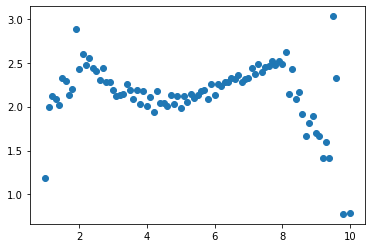

In [37]:
newgroupby = df_new.groupby(['averageRating']).mean()
newgroupby.reset_index(inplace=True)
plt.scatter(newgroupby['averageRating'], newgroupby['log10Votes'])

In [41]:
newgroupby.head()

,averageRating,numVotes,ordering,isAdult,log10Votes
0,1.0,64.500000,2.000000,0.000000,1.187714
1,1.1,248.833333,1.833333,0.333333,1.990993
2,1.2,307.583333,1.500000,0.000000,2.118647
3,1.3,263.000000,2.352941,0.000000,2.087944
4,1.4,306.136364,1.590909,0.000000,2.013794


In [63]:
len(newgroupby)

89

## Q.8

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
X = np.array(newgroupby['averageRating']).reshape(-1,1)
y = np.array(newgroupby['log10Votes']).reshape(-1,1)


In [122]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [123]:
y_pred = regressor.predict(X)

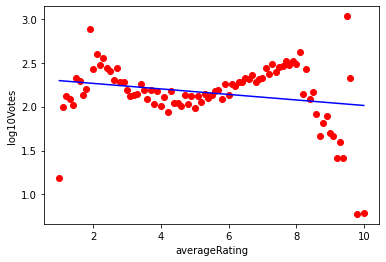

In [124]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_pred, color='blue')
plt.xlabel('averageRating')
plt.ylabel('log10Votes')
plt.show()

Linear Regression Using Scipy

In [48]:
from scipy import stats
from scipy.stats import linregress
from scipy.optimize import minimize

In [52]:
x = np.array(newgroupby['averageRating'])
y = np.array(newgroupby['log10Votes'])

In [54]:
slope, intercept, r_value, p_value, stderr = linregress(x, y)

Text(0, 0.5, 'log10Votes')

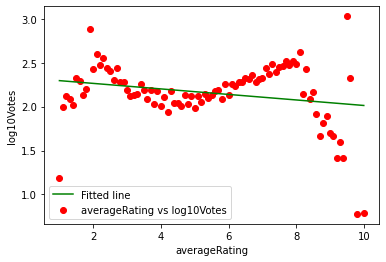

In [55]:
plt.scatter(x,y, color="red", marker="o", label="averageRating vs log10Votes")
 
 
y_pred = intercept + slope*x
plt.plot(x,y_pred, color="green", label="Fitted line")
 
plt.legend(loc='best')
plt.xlabel('averageRating') 
plt.ylabel('log10Votes') 

In [78]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [93]:
x_values = np.array(newgroupby['averageRating'], dtype=np.float32).reshape(-1,1)
y_values = np.array(newgroupby['log10Votes'], dtype=np.float32).reshape(-1,1)


In [100]:
class LinearRegression(nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        self.linear=nn.Linear(inputSize, outputSize)
        
    def forward(self, x):
        out=self.linear(x)
        return out

In [107]:
inputDim = 1        
outputDim = 1       
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
if torch.cuda.is_available():
    model.cuda()

In [108]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [109]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_values).cuda())
        labels = Variable(torch.from_numpy(y_values).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_values))
        labels = Variable(torch.from_numpy(y_values))

    optimizer.zero_grad()

    outputs = model(inputs)

    loss = criterion(outputs, labels)
    print(loss)
    loss.backward()

    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(1.3685, grad_fn=<MseLossBackward0>)
epoch 0, loss 1.368492603302002
tensor(0.9302, grad_fn=<MseLossBackward0>)
epoch 1, loss 0.9302340149879456
tensor(0.8937, grad_fn=<MseLossBackward0>)
epoch 2, loss 0.8937360644340515
tensor(0.8859, grad_fn=<MseLossBackward0>)
epoch 3, loss 0.8859364986419678
tensor(0.8802, grad_fn=<MseLossBackward0>)
epoch 4, loss 0.8802218437194824
tensor(0.8747, grad_fn=<MseLossBackward0>)
epoch 5, loss 0.8746930956840515
tensor(0.8692, grad_fn=<MseLossBackward0>)
epoch 6, loss 0.8692147135734558
tensor(0.8638, grad_fn=<MseLossBackward0>)
epoch 7, loss 0.8637763857841492
tensor(0.8584, grad_fn=<MseLossBackward0>)
epoch 8, loss 0.8583776354789734
tensor(0.8530, grad_fn=<MseLossBackward0>)
epoch 9, loss 0.8530177474021912
tensor(0.8477, grad_fn=<MseLossBackward0>)
epoch 10, loss 0.8476967215538025
tensor(0.8424, grad_fn=<MseLossBackward0>)
epoch 11, loss 0.8424140810966492
tensor(0.8372, grad_fn=<MseLossBackward0>)
epoch 12, loss 0.8371694087982178
tensor(0.8

[[1.0787519]
 [1.0973536]
 [1.1159551]
 [1.1345568]
 [1.1531584]
 [1.1717601]
 [1.1903617]
 [1.2089634]
 [1.2275649]
 [1.2461666]
 [1.2647682]
 [1.2833699]
 [1.3019716]
 [1.3205731]
 [1.3391747]
 [1.3577764]
 [1.376378 ]
 [1.3949797]
 [1.4135814]
 [1.432183 ]
 [1.4507847]
 [1.4693862]
 [1.4879879]
 [1.5065894]
 [1.5251911]
 [1.5437927]
 [1.5623944]
 [1.580996 ]
 [1.5995977]
 [1.6181993]
 [1.636801 ]
 [1.6554025]
 [1.6740042]
 [1.692606 ]
 [1.7112075]
 [1.729809 ]
 [1.7484107]
 [1.7670124]
 [1.785614 ]
 [1.8042157]
 [1.8228173]
 [1.841419 ]
 [1.8600205]
 [1.8786223]
 [1.897224 ]
 [1.9158254]
 [1.934427 ]
 [1.9530287]
 [1.9716303]
 [1.990232 ]
 [2.0088336]
 [2.0274353]
 [2.046037 ]
 [2.0646386]
 [2.0832403]
 [2.101842 ]
 [2.1204433]
 [2.139045 ]
 [2.1576467]
 [2.1762483]
 [2.19485  ]
 [2.2134516]
 [2.2320533]
 [2.250655 ]
 [2.2692566]
 [2.2878582]
 [2.30646  ]
 [2.3250613]
 [2.3436632]
 [2.3622646]
 [2.3808663]
 [2.399468 ]
 [2.4180696]
 [2.4366713]
 [2.455273 ]
 [2.4738746]
 [2.4924762]

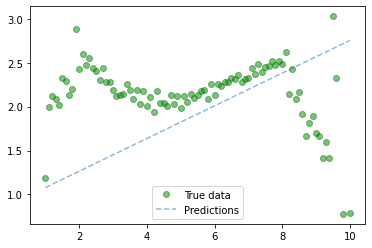

In [111]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_values).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_values))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_values, y_values, 'go', label='True data', alpha=0.5)
plt.plot(x_values, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()